In [39]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.5 MB/s eta 0:00:00


In [1]:
## import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import datetime
%matplotlib inline
#import plotly
#import plotly_express  as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
## upload datasets

books = pd.read_csv("books.csv")

tags_data = pd.read_csv("book_tags.csv")

book_tags = pd.read_csv("tags.csv")

ratings_data=pd.read_csv('ratings.csv')

In [3]:
print("books shape : ",books.shape)
print("tags_data shape : ", tags_data.shape)
print("book_tags shape : ", book_tags.shape)
print("ratings_data shape : ", ratings_data.shape)


books shape :  (10000, 23)
tags_data shape :  (999912, 3)
book_tags shape :  (34252, 2)
ratings_data shape :  (981756, 3)


### ratings_data basic information

In [4]:
ratings_data.sample(5)

book_id  user_id  rating
549680     5516    12957       5
859444     8692    29668       4
46170       462    36137       3
884185     8951    51057       4
903896     9160    11153       5

In [5]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [6]:
ratings_data.describe()

book_id        user_id         rating
count  981756.000000  981756.000000  981756.000000
mean     4943.275636   25616.759933       3.856534
std      2873.207415   15228.338826       0.983941
min         1.000000       1.000000       1.000000
25%      2457.000000   12372.000000       3.000000
50%      4921.000000   25077.000000       4.000000
75%      7414.000000   38572.000000       5.000000
max     10000.000000   53424.000000       5.000000

In [7]:
ratings_data.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [8]:
ratings_data.duplicated().sum()

1644

### books dataset basic information

In [9]:
books.sample(5)

id   book_id  best_book_id   work_id  books_count       isbn  \
8189  8190   9349915       9349915  14233294           34  316176044   
9178  9179  11544466      11544466  16484181           17   62118692   
323    324  16068905      16068905  21861351           80        NaN   
3410  3411   6261522       6261522   6196751           24   61779814   
4194  4195  18170039      18170039  25538638           14   62317148   

            isbn13                                            authors  \
8189  9.780316e+12  Sarah Blakley-Cartwright, David Leslie Johnson...   
9178  9.780062e+12                                      Sarah Crossan   
323            NaN                                     Rainbow Rowell   
3410  9.780062e+12                                   Kimberly Derting   
4194  9.780062e+12                                         Kiera Cass   

      original_publication_year   original_title  ... ratings_count  \
8189                     2011.0  Red Riding Hood  ...         14220   
9178                     2012.0          Breathe  ...         13504   
323                      2013.0              NaN  ...        340379   
3410                     2010.0  The Body Finder  ...         43203   
4194                     2014.0        The Guard  ...         32401   

     work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
8189              16482                     1962        924       2096   
9178              14779                     1705        433       1323   
323              371730                    39353       8626      16973   
3410              44814                     3793       1159       2863   
4194              34837                     2017        751       3205   

      ratings_3  ratings_4  ratings_5  \
8189       4997       4608       3857   
9178       4281       5109       3633   
323       60097     121431     164603   
3410       9247      14666      16879   
4194      10414       9995      10472   

                                              image_url  \
8189  https://images.gr-assets.com/books/1344267754m...   
9178  https://images.gr-assets.com/books/1330286837m...   
323   https://images.gr-assets.com/books/1499565420m...   
3410  https://images.gr-assets.com/books/1358266631m...   
4194  https://images.gr-assets.com/books/1380307008m...   

                                        small_image_url  
8189  https://images.gr-assets.com/books/1344267754s...  
9178  https://images.gr-assets.com/books/1330286837s...  
323   https://images.gr-assets.com/books/1499565420s...  
3410  https://images.gr-assets.com/books/1358266631s...  
4194  https://images.gr-assets.com/books/1380307008s...  

[5 rows x 23 columns]

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [11]:
books.describe()

id       book_id  best_book_id       work_id   books_count  \
count  10000.00000  1.000000e+04  1.000000e+04  1.000000e+04  10000.000000   
mean    5000.50000  5.264697e+06  5.471214e+06  8.646183e+06     75.712700   
std     2886.89568  7.575462e+06  7.827330e+06  1.175106e+07    170.470728   
min        1.00000  1.000000e+00  1.000000e+00  8.700000e+01      1.000000   
25%     2500.75000  4.627575e+04  4.791175e+04  1.008841e+06     23.000000   
50%     5000.50000  3.949655e+05  4.251235e+05  2.719524e+06     40.000000   
75%     7500.25000  9.382225e+06  9.636112e+06  1.451775e+07     67.000000   
max    10000.00000  3.328864e+07  3.553423e+07  5.639960e+07   3455.000000   

             isbn13  original_publication_year  average_rating  ratings_count  \
count  9.415000e+03                9979.000000    10000.000000   1.000000e+04   
mean   9.755044e+12                1981.987674        4.002191   5.400124e+04   
std    4.428619e+11                 152.576665        0.254427   1.573700e+05   
min    1.951703e+08               -1750.000000        2.470000   2.716000e+03   
25%    9.780316e+12                1990.000000        3.850000   1.356875e+04   
50%    9.780452e+12                2004.000000        4.020000   2.115550e+04   
75%    9.780831e+12                2011.000000        4.180000   4.105350e+04   
max    9.790008e+12                2017.000000        4.820000   4.780653e+06   

       work_ratings_count  work_text_reviews_count      ratings_1  \
count        1.000000e+04             10000.000000   10000.000000   
mean         5.968732e+04              2919.955300    1345.040600   
std          1.678038e+05              6124.378132    6635.626263   
min          5.510000e+03                 3.000000      11.000000   
25%          1.543875e+04               694.000000     196.000000   
50%          2.383250e+04              1402.000000     391.000000   
75%          4.591500e+04              2744.250000     885.000000   
max          4.942365e+06            155254.000000  456191.000000   

           ratings_2      ratings_3     ratings_4     ratings_5  
count   10000.000000   10000.000000  1.000000e+04  1.000000e+04  
mean     3110.885000   11475.893800  1.996570e+04  2.378981e+04  
std      9717.123578   28546.449183  5.144736e+04  7.976889e+04  
min        30.000000     323.000000  7.500000e+02  7.540000e+02  
25%       656.000000    3112.000000  5.405750e+03  5.334000e+03  
50%      1163.000000    4894.000000  8.269500e+03  8.836000e+03  
75%      2353.250000    9287.000000  1.602350e+04  1.730450e+04  
max    436802.000000  793319.000000  1.481305e+06  3.011543e+06

In [12]:
books.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [13]:
books.duplicated().sum()

0

### tags_data dataset basic analysis

In [14]:
tags_data.head()

goodreads_book_id  tag_id   count
0                  1   30574  167697
1                  1   11305   37174
2                  1   11557   34173
3                  1    8717   12986
4                  1   33114   12716

In [15]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [16]:
tags_data.shape

(999912, 3)

In [17]:
tags_data.describe()

goodreads_book_id         tag_id          count
count       9.999120e+05  999912.000000  999912.000000
mean        5.263442e+06   16324.527073     208.869633
std         7.574057e+06    9647.846196    3501.265173
min         1.000000e+00       0.000000      -1.000000
25%         4.622700e+04    8067.000000       7.000000
50%         3.948410e+05   15808.000000      15.000000
75%         9.378297e+06   24997.000000      40.000000
max         3.328864e+07   34251.000000  596234.000000

In [18]:
tags_data.isnull().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [19]:
tags_data.duplicated().sum()

6

In [20]:
tags_data.sample(4)

goodreads_book_id  tag_id  count
243059              43929   20986      6
833122           13521299   20926     18
56618                6689    1691    334
667039            6344534    5090      4

### Histogram plot of count in tags_data

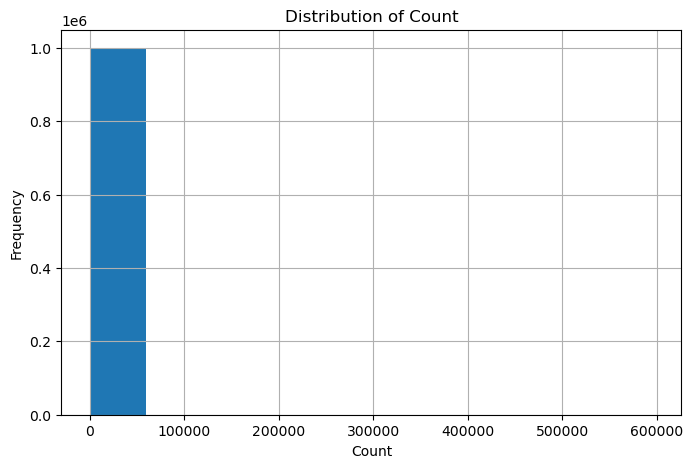

In [21]:
plt.figure(figsize=(8,5))

tags_data["count"].hist()

plt.title("Distribution of Count")
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [22]:
## sort ratings_data datast based on column 'user_id'

ratings_data = ratings_data.sort_values("user_id")

## drop duplicates based on columns 'user_id' and 'book_id'
ratings_data.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 

In [23]:
## drop some features

books= books.drop(columns=['book_id', 'best_book_id', 'work_id', 'isbn', 'isbn13', 'title','work_ratings_count',
                                   'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 
                                    'image_url','small_image_url'])

In [24]:
## drop nan values of books dataset
books = books.dropna()

## drop duplicates of books dataset based on 'original_title' column
books.drop_duplicates(subset='original_title',keep=False,inplace=True)


In [25]:
## filter top 15 books based on 'avarage_rating' 

top_rated = books.sort_values('average_rating', ascending=False)
tf_top_rated = top_rated[:15]


In [26]:
tf_top_rated.head()

id  books_count            authors  original_publication_year  \
3627  3628           14     Bill Watterson                     2005.0   
861    862           34  Brandon Sanderson                     2014.0   
8853  8854            6    Francine Rivers                     1993.0   
4482  4483           21     Bill Watterson                     1996.0   
6360  6361           22     Bill Watterson                     1996.0   

                                         original_title language_code  \
3627                     The Complete Calvin and Hobbes           eng   
861                                   Words of Radiance           eng   
8853                           Mark of the Lion Trilogy         en-US   
4482  It's a Magical World: A Calvin and Hobbes Coll...           eng   
6360  There's Treasure Everywhere: A Calvin and Hobb...           eng   

      average_rating  ratings_count  
3627            4.82          28900  
861             4.77          73572  
8853            4.76           9081  
4482            4.75          22351  
6360            4.74          16766

### Bar plot of Top Rated Books based on their average ratings 

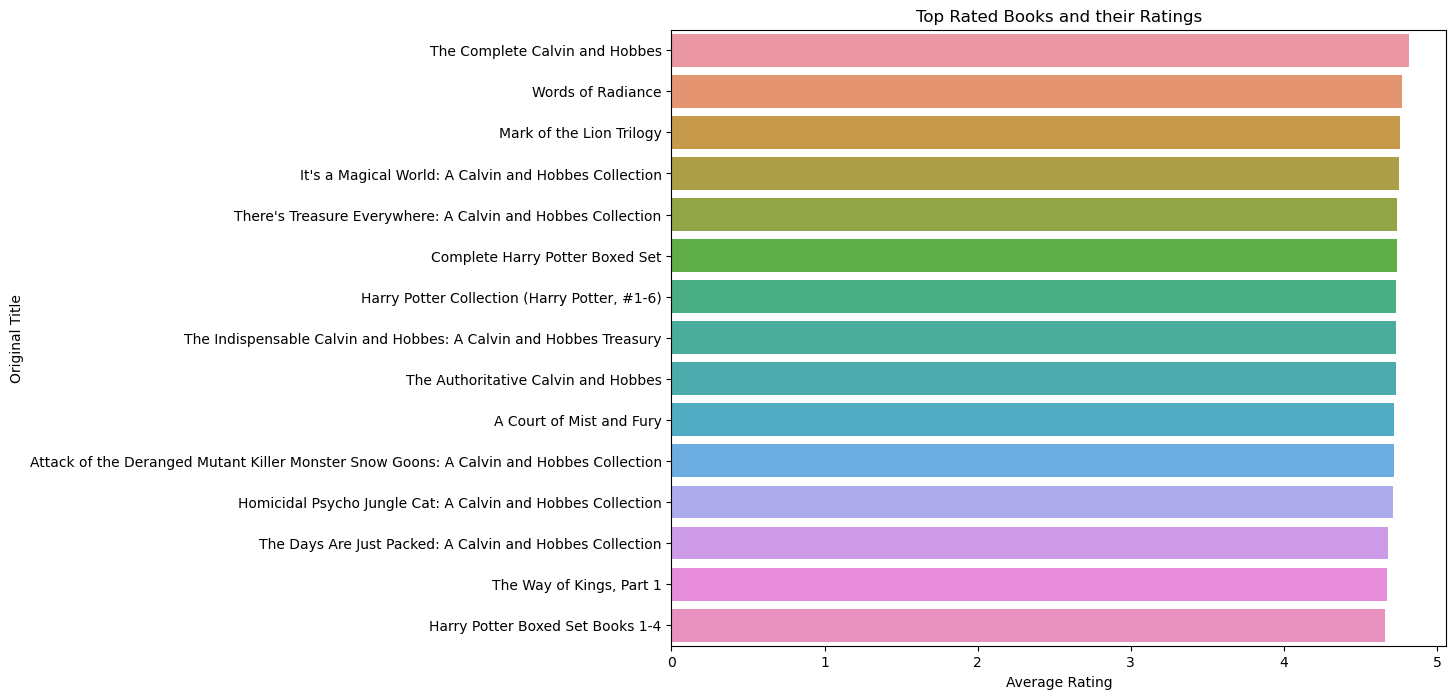

In [27]:
plt.figure(figsize=(10,8))

sns.barplot(x='average_rating', y='original_title', data=tf_top_rated)
plt.xlabel('Average Rating')
plt.ylabel('Original Title')
plt.title("Top Rated Books and their Ratings")
plt.show()

### Histogram of Books based on average ratings

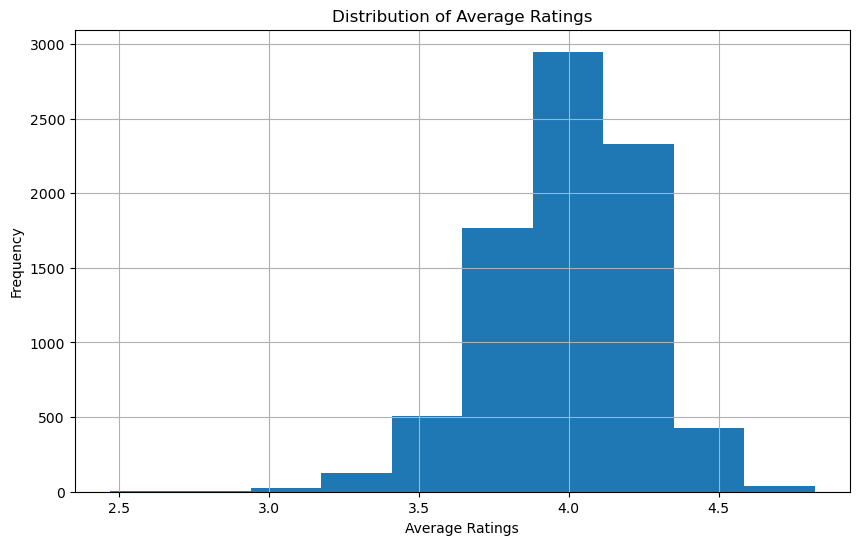

In [28]:
##distribution of average ratings of all the 10000 books

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

books["average_rating"].hist()

plt.title("Distribution of Average Ratings")
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.show()

In [29]:
books2 = pd.read_csv('books.csv')
books2 = books2.dropna()
books2.head()

id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   
3                     To Kill a Mockingbird  ...       3198671   
4                          The Great Gatsby  ...       2683664   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            4800065                    75867      75504     101676   
2            3916824                    95009     456191     436802   
3            3340896                    72586      60427     117415   
4            2773745                    51992      86236     197621   

   ratings_3  ratings_4  ratings_5  \
0     560092    1481305    2706317   
1     455024    1156318    3011543   
2     793319     875073    1355439   
3     446835    1001952    1714267   
4     606158     936012     947718   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1361975680m...   
4  https://images.gr-assets.com/books/1490528560m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  
1  https://images.gr-assets.com/books/1474154022s...  
2  https://images.gr-assets.com/books/1361039443s...  
3  https://images.gr-assets.com/books/1361975680s...  
4  https://images.gr-assets.com/books/1490528560s...  

[5 rows x 23 columns]

In [30]:
## selcet some features from books dataset 

books_filter = pd.DataFrame(books2, columns=['book_id', 'authors', 'original_title', 'average_rating'])

books_filter = books_filter.sort_values('average_rating', ascending=False)

books_filter.head(5)

book_id            authors  \
3627     24812     Bill Watterson   
861   17332218  Brandon Sanderson   
8853     95602    Francine Rivers   
4482     24814     Bill Watterson   
6360     70489     Bill Watterson   

                                         original_title  average_rating  
3627                     The Complete Calvin and Hobbes            4.82  
861                                   Words of Radiance            4.77  
8853                           Mark of the Lion Trilogy            4.76  
4482  It's a Magical World: A Calvin and Hobbes Coll...            4.75  
6360  There's Treasure Everywhere: A Calvin and Hobb...            4.74

In [31]:
## value counts of authors

top_author_counts = books['authors'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count', ascending=False).head(10)

top_author_counts = top_author_counts.rename(columns={'value':'author'})
top_author_counts.head()


author  count
0     Nora Roberts     54
1     Stephen King     53
2  Terry Pratchett     39
3  Agatha Christie     38
4      Dean Koontz     35

### Bar plot of Top authors based on number of books published

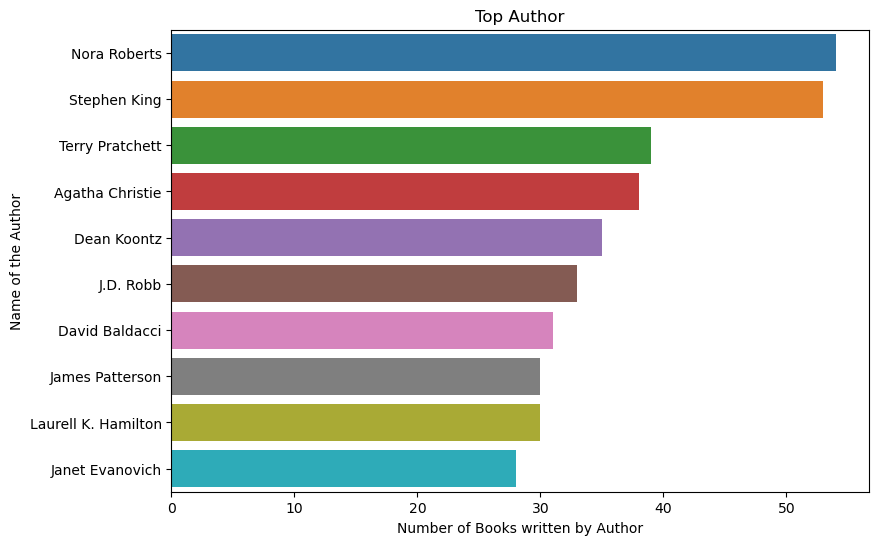

In [32]:
plt.figure(figsize=(9,6))
sns.barplot(x='count', y='author', data=top_author_counts)
plt.xlabel('Number of Books written by Author')
plt.ylabel('Name of the Author')
plt.title('Top Author')
plt.show()

In [33]:
ratings_data.head()

book_id  user_id  rating
117889     1180        1       4
488112     4893        1       3
625717     6285        1       4
796318     8034        2       4
875008     8855        2       5

In [34]:
books.head()

id  books_count                      authors  original_publication_year  \
0   1          272              Suzanne Collins                     2008.0   
1   2          491  J.K. Rowling, Mary GrandPré                     1997.0   
3   4          487                   Harper Lee                     1960.0   
4   5         1356          F. Scott Fitzgerald                     1925.0   
5   6          226                   John Green                     2012.0   

                             original_title language_code  average_rating  \
0                          The Hunger Games           eng            4.34   
1  Harry Potter and the Philosopher's Stone           eng            4.44   
3                     To Kill a Mockingbird           eng            4.25   
4                          The Great Gatsby           eng            3.89   
5                    The Fault in Our Stars           eng            4.26   

   ratings_count  
0        4780653  
1        4602479  
3        3198671  
4        2683664  
5        2346404

In [35]:
## drop duplicates form ratings_data and book dataset

ratings_data.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 
books.drop_duplicates(subset='original_title',keep=False,inplace=True)

In [36]:
## drop columns form books2 dataframe
books2= books2.drop(columns=[ 'best_book_id', 'work_id', 'isbn13', 'title','work_ratings_count',
                                   'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 
                                    'image_url','small_image_url'])

In [37]:
## merge both books2 and ratings dataframes on 'book_id'

merge_data2 = pd.merge(books2, ratings_data, on='book_id')
merge_data2 =  merge_data2.sort_values('book_id', ascending=True)
merge_data2.sample(5)

id  book_id  books_count       isbn                       authors  \
24293  1160     2052          238  394758285              Raymond Chandler   
60863  8296     7579           25  767901576                Lama Surya Das   
22035   964       30           74  345538374                J.R.R. Tolkien   
65116  9642     9648           99  141183721                 George Orwell   
14958   561      378           82  394820371  Norton Juster, Jules Feiffer   

       original_publication_year  \
24293                     1939.0   
60863                     1997.0   
22035                     1973.0   
65116                     1936.0   
14958                     1961.0   

                                          original_title language_code  \
24293                                      The Big Sleep           eng   
60863  Awakening the Buddha Within : Tibetan Wisdom f...         en-US   
22035               The Hobbit and The Lord of the Rings           eng   
65116                         Keep the Aspidistra Flying           eng   
14958                              The Phantom Tollbooth         en-US   

       average_rating  ratings_count  user_id  rating  
24293            4.04          84489     4641       3  
60863            4.18           9912    35157       3  
22035            4.59          90907    11599       4  
65116            3.87           9599     8065       5  
14958            4.22         178432    44617       5

### scatter plot between 'average_rating' and 'rating_count'


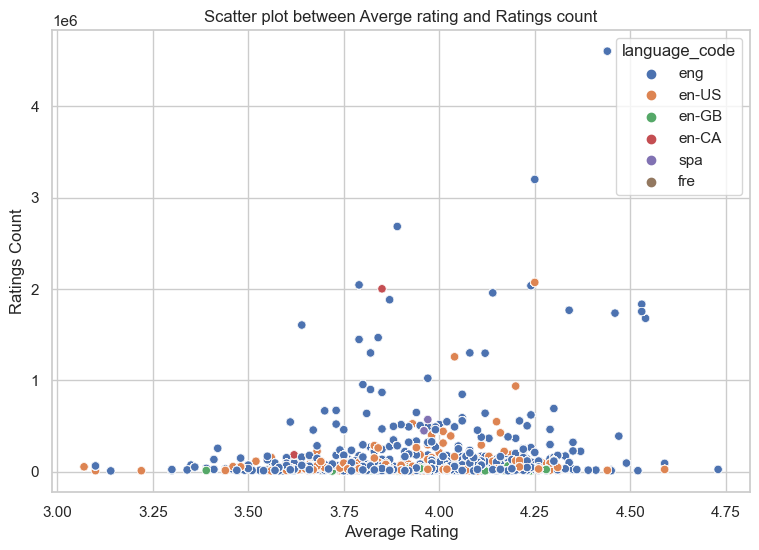

In [38]:
plt.figure(figsize=(9,6))
sns.set(style='whitegrid')
sns.scatterplot(x='average_rating', y='ratings_count',hue='language_code', data=merge_data2)
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.title('Scatter plot between Averge rating and Ratings count')
plt.show()

### scatter plot between 'average_rating' and 'books_count'

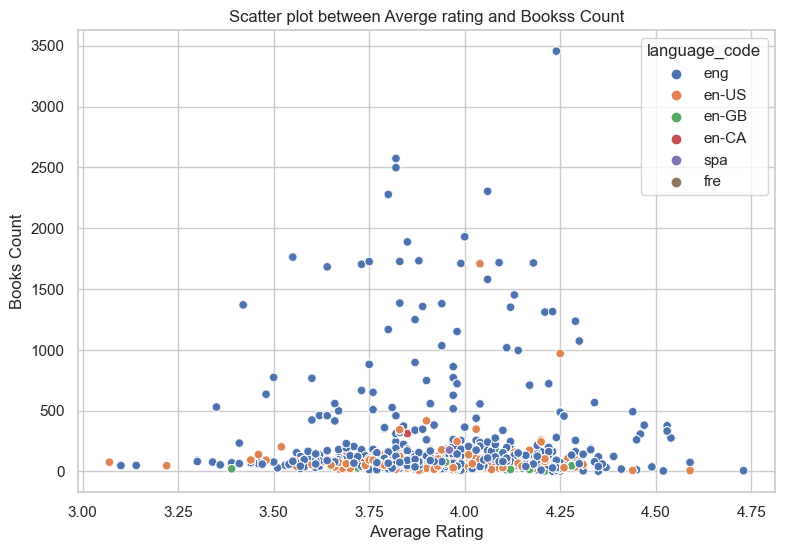

In [39]:
plt.figure(figsize=(9,6))
sns.set(style='whitegrid')
sns.scatterplot(x='average_rating', y='books_count',hue='language_code', data=merge_data2)
plt.xlabel('Average Rating')
plt.ylabel('Books Count')
plt.title('Scatter plot between Averge rating and Bookss Count')
plt.show()

In [40]:
## find frequency of published books based on year

years= books2['original_publication_year'].value_counts().reset_index()
years.columns = ['year', 'count']
years['year'] = years['year']
years['year'] = years['year'].astype('int32')
years.sample(5)

year  count
124  1901      4
184  1850      2
110  1904      5
273  1825      1
84   1929      9

In [41]:
years = years.sort_values('count', ascending=False)
years.head(5)

year  count
0  2011    402
1  2009    379
2  2010    376
3  2012    361
4  2013    337

### Bar plot between Number of published books and Year

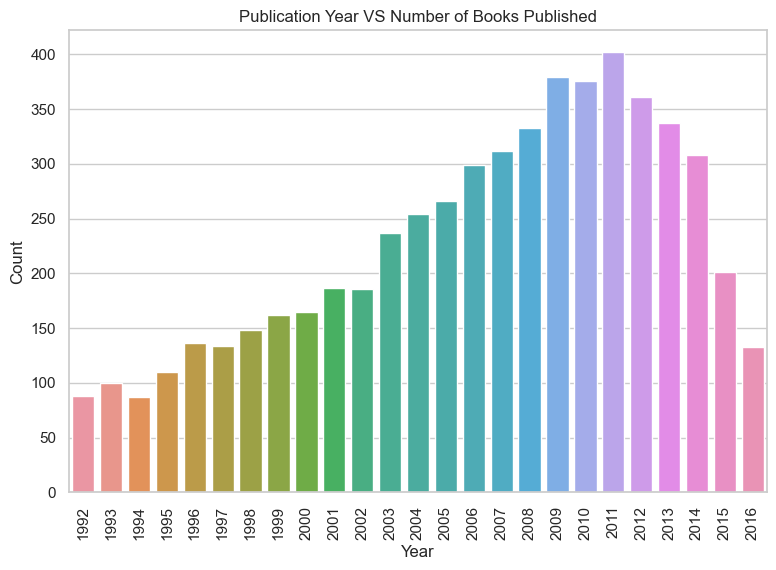

In [42]:
plt.figure(figsize=(9,6))
sns.barplot(x='year', y='count', data=years[:25])
plt.xticks(rotation=90)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Publication Year VS Number of Books Published')
plt.show()

### Pie chart : Number of Books vs Published Year 

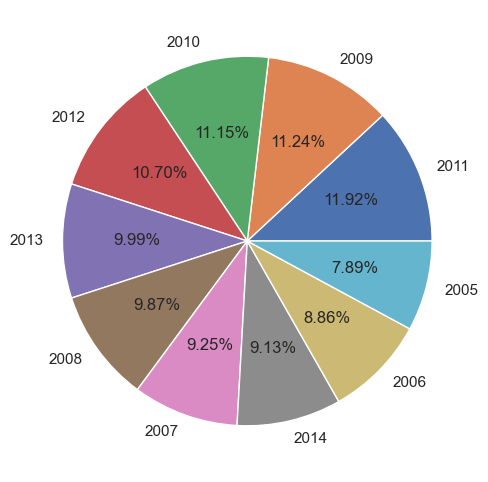

In [43]:
## top 10 years wise books count in percent

plt.figure(figsize=(6,6))
plt.pie(years['count'][:10],labels=years['year'][:10], autopct='%1.2f%%' )
plt.show()

In [44]:
## Language wise published book count

lang= books2['language_code'].value_counts().reset_index()
lang.columns = ['language', 'count']
lang['language'] = lang['language']
lang = lang.sort_values('count', ascending=False).head(5)
lang.head()


language  count
0      eng   5557
1    en-US   1940
2    en-GB    215
3    en-CA     49
4      fre     22

### bar plot between Number of published books and Languages

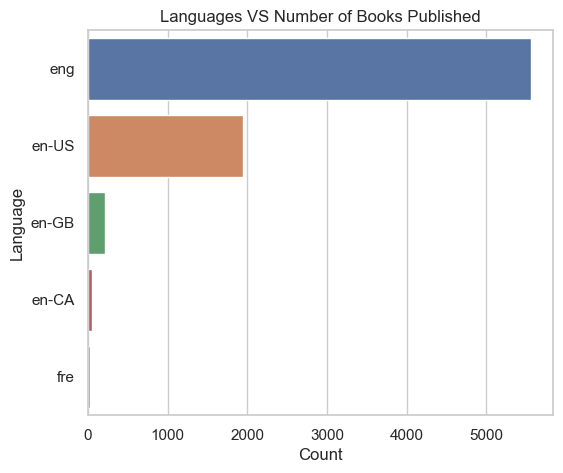

In [67]:
plt.figure(figsize=(6,5))
sns.barplot(x='count', y='language', data=lang)
#plt.xticks(rotation=90)

plt.xlabel('Count')
plt.ylabel('Language')
plt.title('Languages VS Number of Books Published')
plt.show()

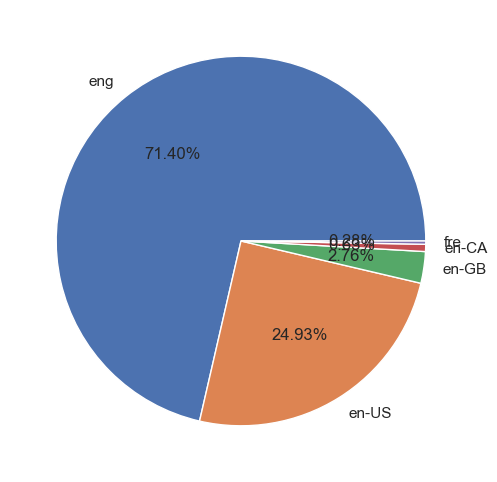

In [46]:
## top 5 Language wise books count in percent

plt.figure(figsize=(6,6))
plt.pie(lang['count'][:5],labels=lang['language'][:5], autopct='%1.2f%%' )
plt.show()

In [47]:
# Mean rating per user (MRPU)

MRPU = ratings_data.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['book_id','rating'],axis=1, inplace=True)
MRPU.head(15)

user_id  mean_rating
0         1     3.666667
1         2     4.333333
2         3     1.000000
3         4     4.000000
4         5     4.200000
5         6     4.500000
6         7     3.797297
7         8     3.666667
8         9     3.142857
9        10     3.750000
10       11     3.888889
11       12     4.000000
12       13     4.000000
13       14     3.800000
14       15     3.500000

In [48]:
## merge ratings_data and MRPU dataframes on 'user_id'

rating_data = pd.merge(ratings_data, MRPU, on=['user_id', 'user_id'])
rating_data.head()

book_id  user_id  rating  mean_rating
0     1180        1       4     3.666667
1     4893        1       3     3.666667
2     6285        1       4     3.666667
3     8034        2       4     4.333333
4     8855        2       5     4.333333

In [49]:
### fetch the data for 'user_id'=11141

ratings_data[ratings_data['user_id']== 11141  ].head(10)

book_id  user_id  rating
971387     9887    11141       5
873192     8836    11141       2
946639     9621    11141       5
859507     8693    11141       3

In [50]:
# Total number of users
ratings_data['user_id'].unique()[-1]   

53424

### EDA on book_tags dataset

In [51]:
book_tags.tail()

tag_id    tag_name
34247   34247   Ｃhildrens
34248   34248   Ｆａｖｏｒｉｔｅｓ
34249   34249       Ｍａｎｇａ
34250   34250      ＳＥＲＩＥＳ
34251   34251  ｆａｖｏｕｒｉｔｅｓ

In [52]:
book_tags.shape

(34252, 2)

In [53]:
book_tags.nunique()

tag_id      34252
tag_name    34252
dtype: int64

In [54]:
book_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [55]:
book_tags.isnull().sum()

tag_id      0
tag_name    0
dtype: int64

In [56]:
book_tags.duplicated().sum()

0

In [57]:
book_tags['tag_name'].nunique()

34252

In [59]:
ratings_data.head(2)

book_id  user_id  rating
117889     1180        1       4
488112     4893        1       3

In [60]:
books.head(2)

id  books_count                      authors  original_publication_year  \
0   1          272              Suzanne Collins                     2008.0   
1   2          491  J.K. Rowling, Mary GrandPré                     1997.0   

                             original_title language_code  average_rating  \
0                          The Hunger Games           eng            4.34   
1  Harry Potter and the Philosopher's Stone           eng            4.44   

   ratings_count  
0        4780653  
1        4602479

In [61]:
## import libraries related to word cloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

### Word Cloud for "authors" column

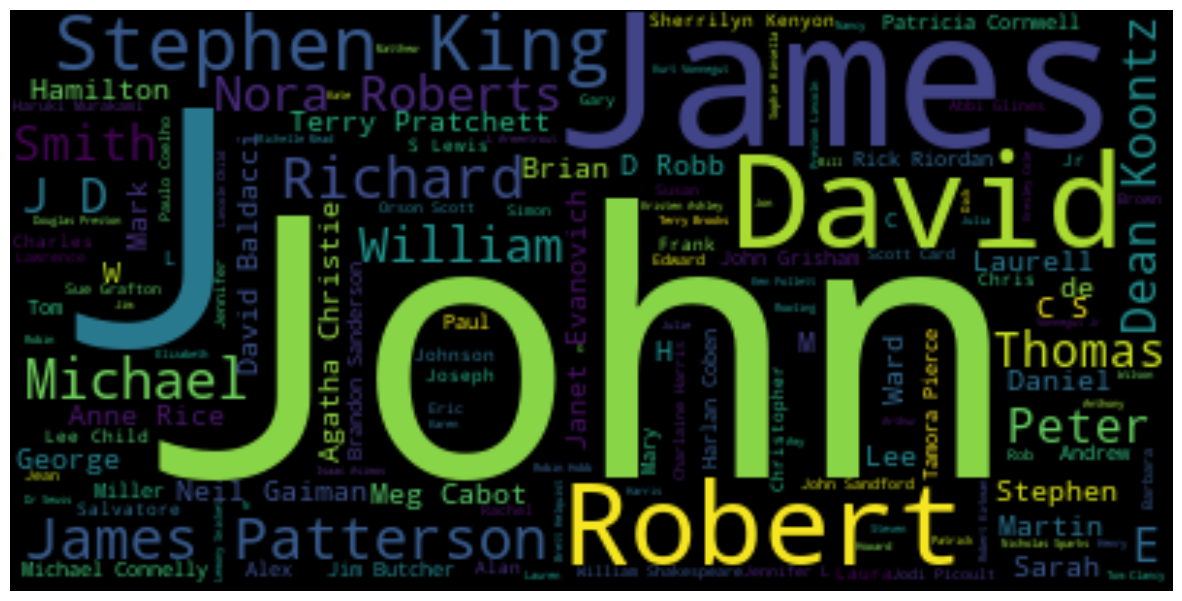

In [62]:
text = " ".join(i for i in books.authors)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for "original_title" column

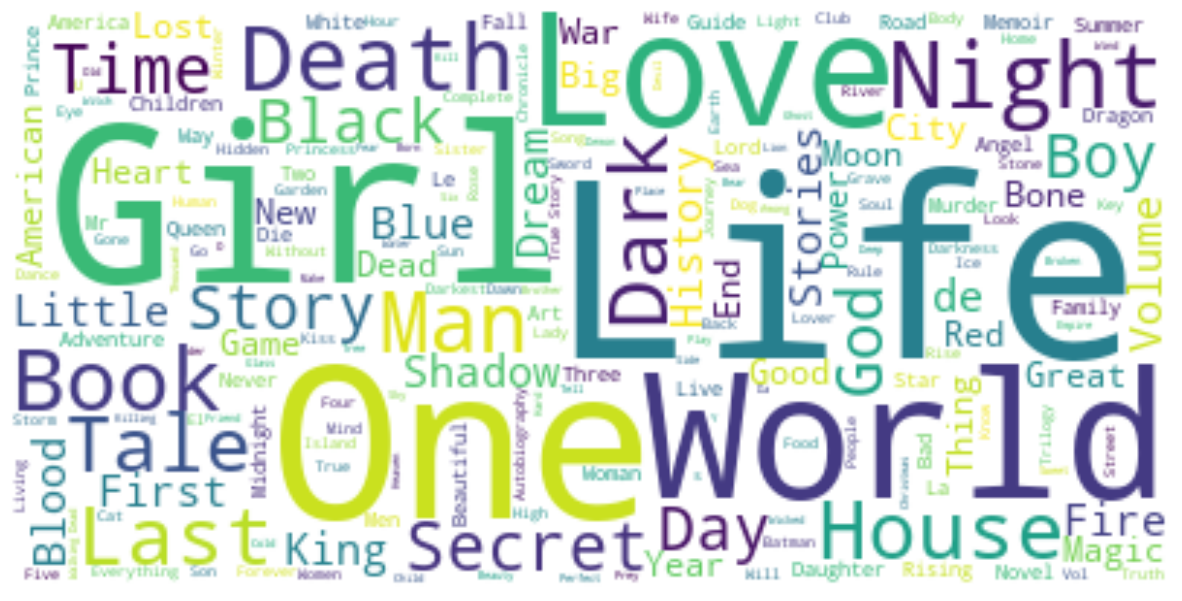

In [63]:
text = " ".join(i for i in books.original_title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
authors_plus_titles = books['authors'] + ' '+ books['original_title']
authors_plus_titles

0                        Suzanne Collins The Hunger Games
1       J.K. Rowling, Mary GrandPré Harry Potter and t...
3                        Harper Lee To Kill a Mockingbird
4                    F. Scott Fitzgerald The Great Gatsby
5                       John Green The Fault in Our Stars
                              ...                        
9994                   Herman Melville Billy Budd, Sailor
9995                             Ilona Andrews Bayou Moon
9996                      Robert A. Caro Means of Ascent 
9997                Patrick O'Brian The Mauritius Command
9998    Peggy Orenstein Cinderella Ate My Daughter: Di...
Length: 8175, dtype: object

### Word Cloud for combined 'authors' and 'original_title' columns

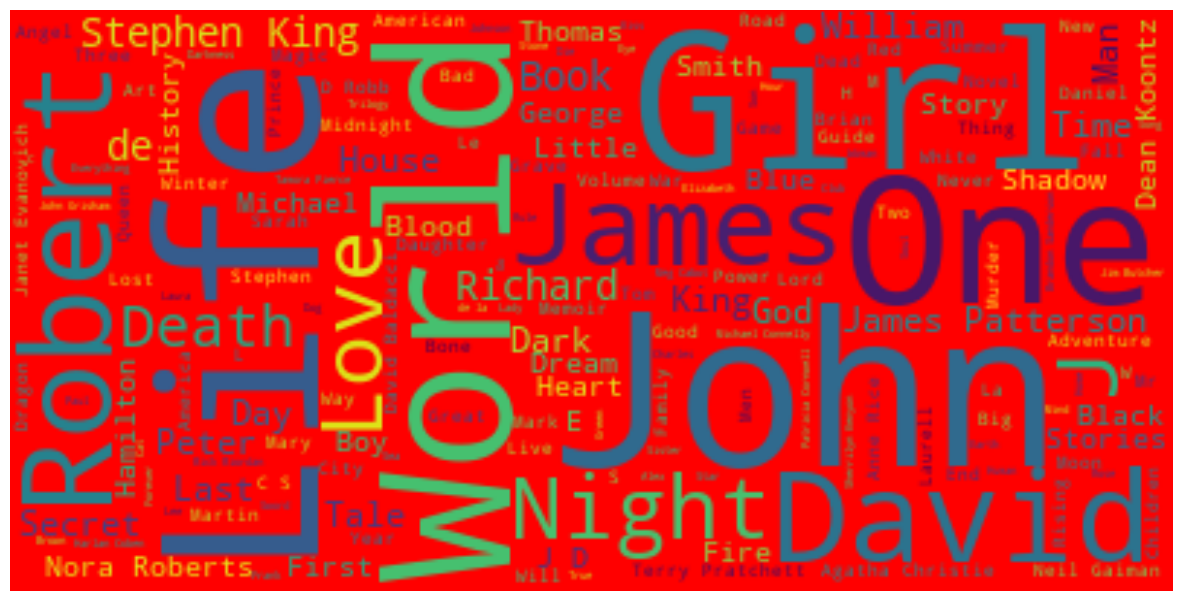

In [65]:
text = " ".join(i for i in authors_plus_titles)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="red").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
from platform import python_version
print(python_version())

3.9.13
